In [8]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns


# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
# Save config information.


with open("C:\\Pri doc\\priti\\Projects\\Myproject\\Berkely\\Week 3 Python\\config.json") as data_file:   
    data = json.load(data_file)

#print(data)
api_key= data ['citi_api_key']
consumer_key = data['Tconsumer_key']
consumer_secret = data['Tconsumer_secret']
access_token = data ['Taccess_token']
access_token_secret = data ['Taccess_token_secret'] 

#print(api_key)
#print(consumer_key)



In [9]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [10]:
#Function to get the tweets
def getTweets(target_user):
# Counter
    counter = 1
# Variables for holding sentiments
    sentiments = []
# Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target_user, page=x)

        # Loop through all tweets 
        for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            target_user = target_user
        
        # Add sentiments for each tweet into an array
            sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter,
                          "target_user" : target_user})
        
        # Add to counter 
            counter = counter + 1

# Convert sentiments to DataFrame
    sentiments_pd = pd.DataFrame.from_dict(sentiments)
    sentiments_pd.head()
    return sentiments_pd

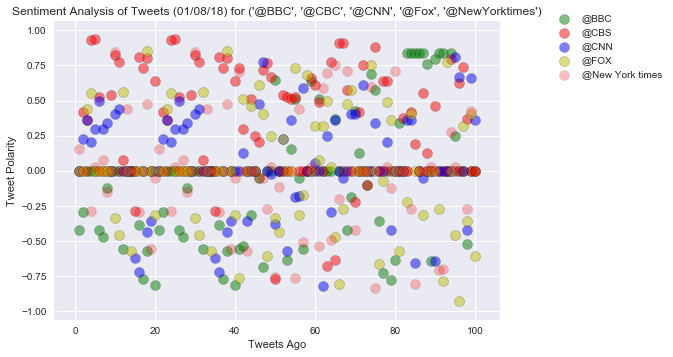

In [11]:
#Get the tweets for each user 
target_terms = ("@BBC", "@CBC", "@CNN",
                "@Fox", "@NewYorktimes")
N = 10
colors = np.random.rand(N)

b = getTweets ("@BBCWorld")
c = getTweets ("@CBSTweet")
cn = getTweets ("@CNN")
cf = getTweets ("@FoxNews")
cny = getTweets ("@nytimes")

  # Create scatter plot
area = 100
plt.scatter(x = b["Tweets Ago"] , y =b["Compound"], s=area, c="g", alpha=0.5,edgecolors="black" ,label = '@BBC' )
plt.scatter(x = c["Tweets Ago"] , y =c["Compound"], s=area,  c="r" , alpha=0.5, edgecolors="black" ,label = '@CBS'  )
plt.scatter(x = cn["Tweets Ago"] , y =cn["Compound"], s=area,  c="b", alpha=0.5 , edgecolors="black" ,label = '@CNN' )
plt.scatter(x = cf["Tweets Ago"] , y =cf["Compound"], s=area,  c="y", alpha=0.5 , edgecolors="black",label = '@FOX')
plt.scatter(x = cny["Tweets Ago"] , y =cny["Compound"], s=area,  c="red", alpha=0.25 , edgecolors="black",label = '@New York times')
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), target_terms))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.savefig("Sentiment Analysis of Tweets.png")
plt.show()

In [12]:
#Dataframe to have sentiments for each 
df = pd.DataFrame([["@BBC",b["Compound"].mean()],
                      ["@CBS",c["Compound"].mean()],
                      ["@CNN",cn["Compound"].mean()],
                      ["@Fox" ,cf["Compound"].mean()],
                      ["@New York times",cny["Compound"].mean()]              
                     ], columns=['User', 'value'])

In [13]:
#dataframe with values for sentiments
df

,User,value
0,@BBC,-0.040502
1,@CBS,0.329033
2,@CNN,0.051121
3,@Fox,0.015937
4,@New York times,-0.011320


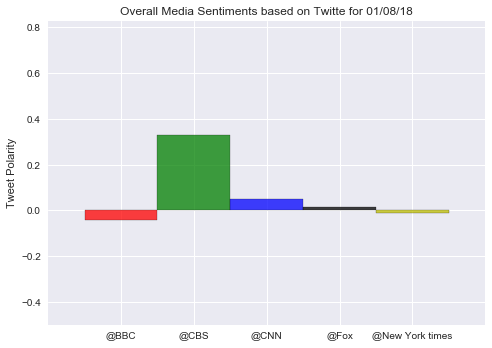

In [14]:
# Set x values
x_values = np.arange(len(df))

# Set figure size to adjust for space
plt.figure(figsize=(7, 5))
#Plot the data:
my_colors = 'rgbkymc'
# Create a bar chart
plt.bar(x_values,df["value"], color=my_colors, alpha=0.75, width=1, edgecolor='black')
# Create ticks
plt.xticks(x_values,df["User"], rotation="horizontal")

# Set x and y limits
plt.xlim(-1,len(x_values))
plt.ylim(-0.50, max(df["value"])+ 0.5)


plt.title("Overall Media Sentiments based on Twitte for %s" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.tight_layout()
plt.savefig("Overall Media Sentiments.png")

plt.show()